# Project 7.3 Cats and Dogs classifier with real image dataset
And image_dataset_from_directory utility  

By guide of https://keras.io/examples/vision/image_classification_from_scratch/

In [7]:
!conda init bash

/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
no change     /home/user/miniconda3/condabin/conda
no change     /home/user/miniconda3/bin/conda
no change     /home/user/miniconda3/bin/conda-env
no change     /home/user/miniconda3/bin/activate
no change     /home/user/miniconda3/bin/deactivate
no change     /home/user/miniconda3/etc/profile.d/conda.sh
no change     /home/user/miniconda3/etc/fish/conf.d/conda.fish
no change     /home/user/miniconda3/shell/condabin/Conda.psm1
no change     /home/user/miniconda3/shell/condabin/conda-hook.ps1
no change     /home/user/miniconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /home/user/miniconda3/etc/profile.d/conda.csh
no change     /home/user/.bashrc
No action taken.


In [8]:
!conda activate tf

/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)

CondaError: Run 'conda init' before 'conda activate'



In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

import os
from tensorflow import data as tf_data

## Caution! downloading the dataset below

In [11]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  33.0M      0  0:00:23  0:00:23 --:--:-- 31.8M


In [15]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 CDLA-Permissive-2.0.pdf   cats_dogs_cnn.ipynb	       'readme[1].txt'
 PetImages		   kagglecatsanddogs_5340.zip


In [27]:
# print(tf.config.list_physical_devices('GPU'))

In [16]:
!ls PetImages

/bin/bash: /home/user/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cat  Dog


### filtering out corrupted images?
???

"When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header."

In [17]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 1740 images.


## Dataset creation from files

In [18]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23262 files belonging to 2 classes.
Using 18610 files for training.
Using 4652 files for validation.


2024-03-20 15:11:50.151423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 15:11:50.161357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 15:11:50.161403: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 15:11:50.162092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [19]:
class_names = ["cat", "dog"]

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


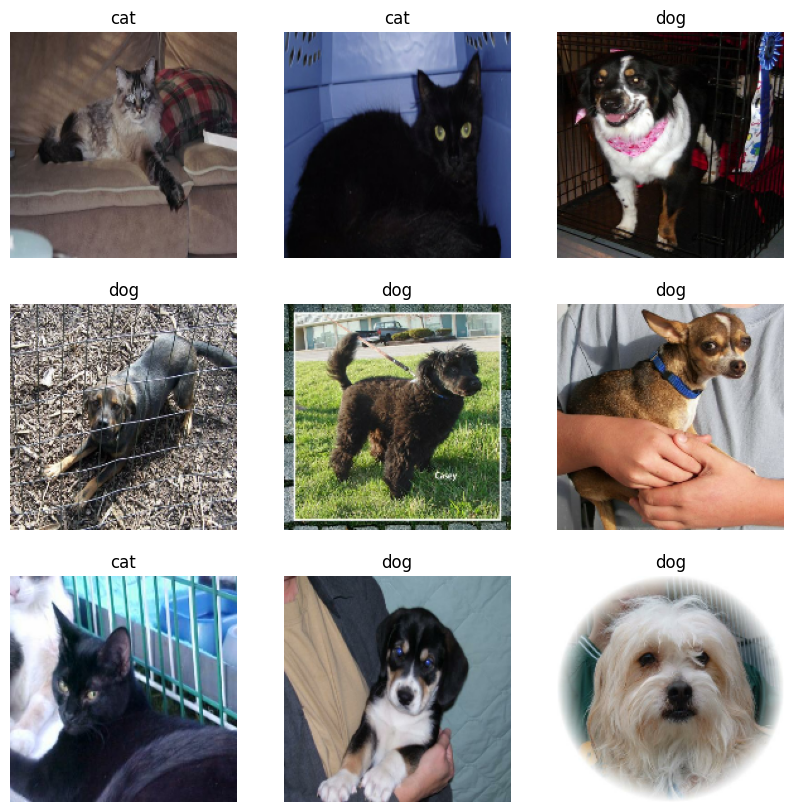

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

### Data augmentation

In [21]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


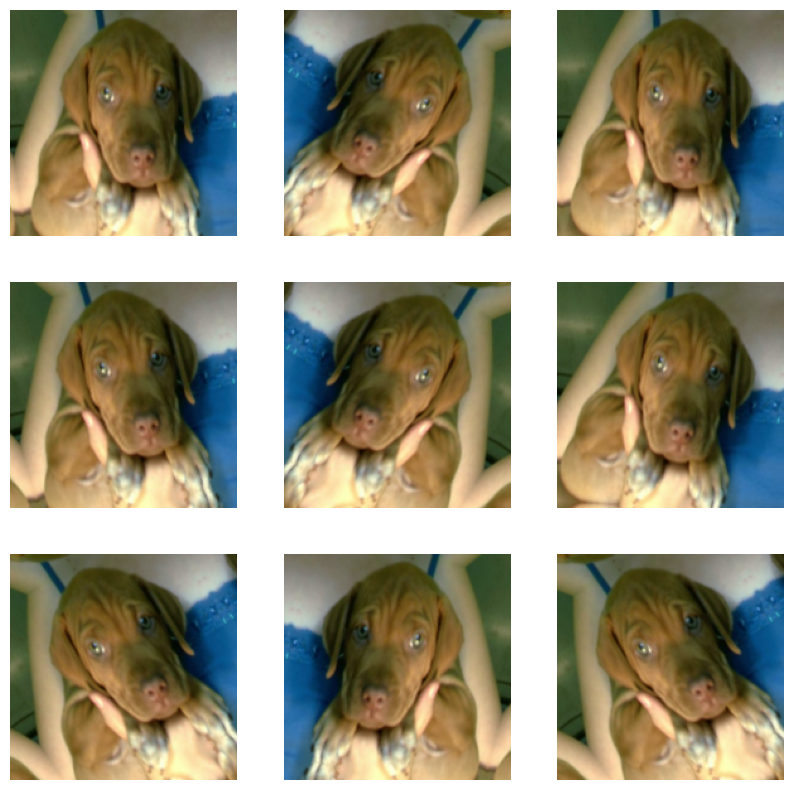

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

#### applying augmentation to train data
Note: this doesn't actually apply these transformations now - it creates a mapping with batching and prefetching, that will be called asynchronously during retrieving the batches during the fitting process

In [23]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


## Modelling

### Simple conv model

In [21]:
# num_classes = 2

In [24]:
model_small = tf.keras.Sequential([
    layers.Rescaling(1./255),
    # layers.RandomFlip(),
    # layers.RandomRotation(factor=(-0.2, 0, 0.3)),
    layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dense(num_classes),
    layers.Dense(1),
    layers.Softmax()
])

### Important - when dealing with image (or other heavy data format) - modelcheckpoints can prove very beneficiary
Along with other callbacks like earlystopping

In [28]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

model_small.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

model_small.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
2024-03-20 15:13:01.465572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-03-20 15:13:03.243178: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-20 15:13:05.017370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-20 15:13:05.269413: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f5f28003fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-20 15:13:05.269460: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-03-20 15:13:05.299849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CR

 16/146 [==>...........................] - ETA: 14s - loss: 7.5353 - acc: 0.5059

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 20s - loss: 7.4730 - acc: 0.5099

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 21s - loss: 7.5388 - acc: 0.5056

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 23s - loss: 7.5777 - acc: 0.5031

 68/146 [============>.................] - ETA: 19s - loss: 7.6929 - acc: 0.4955

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 18s - loss: 7.6858 - acc: 0.4960

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 18s - loss: 7.6842 - acc: 0.4961

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


146/146 [==============================] - ETA: 0s - loss: 7.6664 - acc: 0.4973

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 48s 277ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 2/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 14/146 [=>............................] - ETA: 13s - loss: 7.6501 - acc: 0.4983

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 14s - loss: 7.5434 - acc: 0.5053

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 16s - loss: 7.6151 - acc: 0.5006

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 18s - loss: 7.6282 - acc: 0.4998

 68/146 [============>.................] - ETA: 12s - loss: 7.7105 - acc: 0.4944

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 11s - loss: 7.6660 - acc: 0.4973

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 11s - loss: 7.6354 - acc: 0.4993

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6665 - acc: 0.4973

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 26s 172ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 3/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 15/146 [==>...........................] - ETA: 14s - loss: 7.5214 - acc: 0.5068

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 17s - loss: 7.5326 - acc: 0.5060

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 19s - loss: 7.5103 - acc: 0.5075

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 32/146 [=====>........................] - ETA: 19s - loss: 7.6321 - acc: 0.4995

 69/146 [=============>................] - ETA: 12s - loss: 7.6885 - acc: 0.4958

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 12s - loss: 7.6792 - acc: 0.4964

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 11s - loss: 7.6513 - acc: 0.4983

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6641 - acc: 0.4974

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 26s 172ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 4/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 15/146 [==>...........................] - ETA: 15s - loss: 7.3308 - acc: 0.5193

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 17s - loss: 7.5596 - acc: 0.5043

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 18s - loss: 7.5341 - acc: 0.5059

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 19s - loss: 7.7113 - acc: 0.4943

 68/146 [============>.................] - ETA: 12s - loss: 7.6929 - acc: 0.4955

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 12s - loss: 7.6726 - acc: 0.4969

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 11s - loss: 7.6513 - acc: 0.4983

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6632 - acc: 0.4975

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 26s 174ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 5/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 16/146 [==>...........................] - ETA: 16s - loss: 7.5204 - acc: 0.5068

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 21s - loss: 7.5596 - acc: 0.5043

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 22s - loss: 7.6294 - acc: 0.4997

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 20s - loss: 7.6607 - acc: 0.4976

 69/146 [=============>................] - ETA: 13s - loss: 7.6436 - acc: 0.4988

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 12s - loss: 7.6527 - acc: 0.4982

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 11s - loss: 7.6107 - acc: 0.5009

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6657 - acc: 0.4973

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 27s 180ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 6/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 16/146 [==>...........................] - ETA: 14s - loss: 7.5353 - acc: 0.5059

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 15s - loss: 7.5271 - acc: 0.5064

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 16s - loss: 7.5960 - acc: 0.5019

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 16s - loss: 7.6030 - acc: 0.5014

 68/146 [============>.................] - ETA: 12s - loss: 7.6754 - acc: 0.4967

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 11s - loss: 7.6445 - acc: 0.4987

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 11s - loss: 7.6560 - acc: 0.4979

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6657 - acc: 0.4973

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 26s 175ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 7/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 14/146 [=>............................] - ETA: 14s - loss: 7.6161 - acc: 0.5006

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 15s - loss: 7.5055 - acc: 0.5078

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 17s - loss: 7.5531 - acc: 0.5047

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 20s - loss: 7.6752 - acc: 0.4967

 69/146 [=============>................] - ETA: 15s - loss: 7.6781 - acc: 0.4965

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6726 - acc: 0.4969

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 13s - loss: 7.6246 - acc: 0.5000

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6624 - acc: 0.4975

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 29s 192ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 8/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 13/146 [=>............................] - ETA: 14s - loss: 7.4047 - acc: 0.5144

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 15s - loss: 7.5380 - acc: 0.5057

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 17s - loss: 7.5531 - acc: 0.5047

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 32/146 [=====>........................] - ETA: 20s - loss: 7.6432 - acc: 0.4988

 68/146 [============>.................] - ETA: 15s - loss: 7.6579 - acc: 0.4978

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6494 - acc: 0.4984

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 13s - loss: 7.6045 - acc: 0.5013

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6698 - acc: 0.4970

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 28s 189ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 9/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 13/146 [=>............................] - ETA: 13s - loss: 7.4597 - acc: 0.5108

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 14s - loss: 7.5542 - acc: 0.5046

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 16s - loss: 7.5341 - acc: 0.5059

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 19s - loss: 7.7040 - acc: 0.4948

 69/146 [=============>................] - ETA: 14s - loss: 7.6557 - acc: 0.4980

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6610 - acc: 0.4976

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 13s - loss: 7.6571 - acc: 0.4979

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6690 - acc: 0.4971

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 28s 186ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 10/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 16/146 [==>...........................] - ETA: 18s - loss: 7.6767 - acc: 0.4966

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 18s - loss: 7.6246 - acc: 0.5000

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 17s - loss: 7.5674 - acc: 0.5038

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 17s - loss: 7.6354 - acc: 0.4993

 69/146 [=============>................] - ETA: 11s - loss: 7.6902 - acc: 0.4957

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 11s - loss: 7.6743 - acc: 0.4967

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 10s - loss: 7.6509 - acc: 0.4983

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6690 - acc: 0.4971

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 25s 167ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 11/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


  9/146 [>.............................] - ETA: 15s - loss: 7.4261 - acc: 0.5130

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 13s - loss: 7.5651 - acc: 0.5039

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 15s - loss: 7.5722 - acc: 0.5034

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 18s - loss: 7.7401 - acc: 0.4924

 69/146 [=============>................] - ETA: 14s - loss: 7.6661 - acc: 0.4973

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 13s - loss: 7.6710 - acc: 0.4970

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 13s - loss: 7.6450 - acc: 0.4987

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6632 - acc: 0.4975

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 27s 184ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 12/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 12/146 [=>............................] - ETA: 14s - loss: 7.3864 - acc: 0.5156

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 13s - loss: 7.4784 - acc: 0.5096

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 15s - loss: 7.5865 - acc: 0.5025

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 19s - loss: 7.7077 - acc: 0.4946

 69/146 [=============>................] - ETA: 14s - loss: 7.6143 - acc: 0.5007

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6213 - acc: 0.5002

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 13s - loss: 7.6045 - acc: 0.5013

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6641 - acc: 0.4974

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 28s 186ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 13/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 14/146 [=>............................] - ETA: 13s - loss: 7.3183 - acc: 0.5201

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 14s - loss: 7.5055 - acc: 0.5078

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 17s - loss: 7.4960 - acc: 0.5084

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 20s - loss: 7.6607 - acc: 0.4976

 68/146 [============>.................] - ETA: 15s - loss: 7.6947 - acc: 0.4954

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6759 - acc: 0.4966

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/146 [==============>...............] - ETA: 13s - loss: 7.6432 - acc: 0.4988

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6706 - acc: 0.4970

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 28s 188ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 14/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 14/146 [=>............................] - ETA: 14s - loss: 7.6501 - acc: 0.4983

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 22/146 [===>..........................] - ETA: 18s - loss: 7.5271 - acc: 0.5064

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/146 [====>.........................] - ETA: 20s - loss: 7.5341 - acc: 0.5059

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/146 [=====>........................] - ETA: 22s - loss: 7.6716 - acc: 0.4969

 69/146 [=============>................] - ETA: 15s - loss: 7.7230 - acc: 0.4935

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 72/146 [=============>................] - ETA: 14s - loss: 7.6991 - acc: 0.4951

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 76/146 [==============>...............] - ETA: 14s - loss: 7.6889 - acc: 0.4958

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


145/146 [============================>.] - ETA: 0s - loss: 7.6682 - acc: 0.4971

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


146/146 [==============================] - 29s 193ms/step - loss: 7.6664 - acc: 0.4973 - val_loss: 7.5459 - val_acc: 0.5052
Epoch 15/25


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


  4/146 [..............................] - ETA: 17s - loss: 7.5948 - acc: 0.5020

KeyboardInterrupt: 

In [25]:
# loaded_model = new_model = tf.keras.models.load_model('save_at_5.keras')

In [ ]:
img = keras.utils.load_img("PetImages/Cat/6779.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model_small.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

In [11]:
# model_small_augment = tf.keras.Sequential([
#     layers.Rescaling(1./255),
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(filters=64,  kernel_size = 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     # layers.Dense(num_classes),
#     layers.Dense(1),
#     layers.Softmax()
# ])

In [12]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## Bigger Xception-type network

In [14]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
